In [1]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

In [17]:
G = nx.read_gml('../Dados/grafo_corrigido.gml')

In [3]:
# # Ordenar as arestas com base no peso
# sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
# sorted_edges

In [4]:
# G.nodes['astroneer_topico20']

In [5]:
# G.nodes['playerunknowns battlegrounds_topico590']

In [6]:
# usa o Louvain para computar a melhor partição
partition = community_louvain.best_partition(G)

In [7]:
# Plot do grafo
#Layout
pos = nx.spring_layout(G)

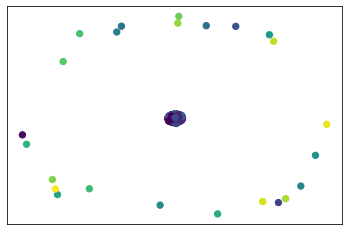

In [10]:
# Cores para representar uma comunidade em particular
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

# nx.draw_networkx_labels(G, pos=pos)

plt.show()

In [19]:
c = nx.community.greedy_modularity_communities(G, weight='weight')
sorted(c[0])

['ark survival evolved_topico0',
 'ark survival evolved_topico1',
 'ark survival evolved_topico2',
 'astroneer_topico0',
 'astroneer_topico1',
 'astroneer_topico10',
 'astroneer_topico11',
 'astroneer_topico12',
 'astroneer_topico13',
 'astroneer_topico14',
 'astroneer_topico16',
 'astroneer_topico17',
 'astroneer_topico18',
 'astroneer_topico19',
 'astroneer_topico2',
 'astroneer_topico21',
 'astroneer_topico22',
 'astroneer_topico23',
 'astroneer_topico24',
 'astroneer_topico26',
 'astroneer_topico4',
 'astroneer_topico5',
 'astroneer_topico6',
 'astroneer_topico8',
 'astroneer_topico9',
 'dead by daylight_topico0',
 'dead by daylight_topico1',
 'dead by daylight_topico10',
 'dead by daylight_topico102',
 'dead by daylight_topico104',
 'dead by daylight_topico108',
 'dead by daylight_topico110',
 'dead by daylight_topico112',
 'dead by daylight_topico116',
 'dead by daylight_topico117',
 'dead by daylight_topico119',
 'dead by daylight_topico12',
 'dead by daylight_topico123',
 'dead

In [18]:
# Remover as arestas com 'weight' menor que 0.5
print(len(G.edges()))
for edge in list(G.edges(data=True)):
    if edge[2]['weight'] < 0.7:
        G.remove_edge(edge[0], edge[1])
print(len(G.edges()))

106250
48997


### community louvain

In [84]:
import community

# Adicionar nós e arestas ponderadas ao grafo (representando a similaridade entre tópicos)

G = nx.read_gml('../Dados/grafo_corrigido.gml')

# Remover as arestas com 'weight' menor que 0.5
print(len(G.edges()))
for edge in list(G.edges(data=True)):
    if edge[2]['weight'] < 0.7:
        G.remove_edge(edge[0], edge[1])
print(len(G.edges()))

# Executar o algoritmo Louvain para detecção de comunidades
partition = community_louvain.best_partition(G, weight='weight')

106250
48997


In [69]:
partition

{'ark survival evolved_topico0': 0,
 'ark survival evolved_topico1': 1,
 'ark survival evolved_topico2': 2,
 'ark survival evolved_topico3': 3,
 'astroneer_topico0': 0,
 'astroneer_topico1': 0,
 'astroneer_topico2': 0,
 'astroneer_topico3': 2,
 'astroneer_topico4': 5,
 'astroneer_topico5': 2,
 'astroneer_topico6': 0,
 'astroneer_topico7': 6,
 'astroneer_topico8': 0,
 'astroneer_topico9': 0,
 'astroneer_topico10': 0,
 'astroneer_topico11': 1,
 'astroneer_topico12': 0,
 'astroneer_topico13': 0,
 'astroneer_topico14': 2,
 'astroneer_topico15': 2,
 'astroneer_topico16': 0,
 'astroneer_topico17': 0,
 'astroneer_topico18': 0,
 'astroneer_topico19': 1,
 'astroneer_topico20': 7,
 'astroneer_topico21': 0,
 'astroneer_topico22': 0,
 'astroneer_topico23': 0,
 'astroneer_topico24': 1,
 'astroneer_topico25': 8,
 'astroneer_topico26': 0,
 'astroneer_topico27': 6,
 'astroneer_topico28': 9,
 'dead by daylight_topico0': 0,
 'dead by daylight_topico1': 10,
 'dead by daylight_topico2': 0,
 'dead by dayli

In [85]:
# Criar um novo grafo para armazenar os grupos de tópicos similares
group_graph = nx.Graph()

# Adicionar os nós ao novo grafo com seus respectivos grupos
for node, community_id in partition.items():
    group_graph.add_node(node, group=community_id)

In [86]:
# Adicionar as arestas ao novo grafo apenas entre nós de grupos diferentes e com peso igual ou acima de um limite
threshold = 0.7  # Limite de similaridade para considerar uma aresta
for node1, node2, data in G.edges(data=True):
    weight = data['weight']
    group1 = partition[node1]
    group2 = partition[node2]
    # print(node1)
    # print(group1)
    # print(node2)
    # print(group2)
    # print(weight)
    # break
    if group1 == group2 and weight >= threshold:
        group_graph.add_edge(node1, node2, weight=weight)

In [87]:
# Calcular as componentes conexas
componentes_conexas = nx.connected_components(group_graph)

# Obter a quantidade de componentes conexas
len(list(componentes_conexas))

228

In [88]:
# Exibir os nós antes da remoção
print("Nós antes da remoção:")
print(len(list(group_graph.nodes())))

# Remover nós com grau 0
nodes_to_remove = [node for node, degree in dict(group_graph.degree()).items() if degree == 0]
group_graph.remove_nodes_from(nodes_to_remove)

# Exibir os nós após a remoção
print("Nós após a remoção:")
print(len(list(group_graph.nodes())))

Nós antes da remoção:
3087
Nós após a remoção:
2895


In [93]:
# Calcular as componentes conexas
componentes_conexas = nx.connected_components(group_graph)

# Obter a quantidade de componentes conexas
len(list(componentes_conexas))

36

In [90]:
nx.write_gml(group_graph, '../Dados/grafo_grupos.gml')

### iterar sob cada componente conexa

In [99]:
# Iterar sobre cada componente conexa
for componente in nx.connected_components(group_graph):
    # print("Componente conexa:")
    # print(componente)
    
    for node in componente:
        print(G.nodes[node])
        # break
    break

{'topic_info': "[('tactical', 0.6974337), ('tactics', 0.6141401), ('combat', 0.4768563), ('strategy', 0.47378814), ('game', 0.45545858), ('playstyle', 0.4018921), ('play', 0.39694738), ('fun', 0.3936618), ('victory', 0.3678833), ('stealth', 0.35681942)]"}
{'topic_info': "[('capcom', 0.90249753), ('gameplay', 0.47350278), ('games', 0.4479375), ('game', 0.43794465), ('ps4', 0.39813864), ('multiplayer', 0.38695204), ('release', 0.37903163), ('community', 0.35513744), ('console', 0.34593952), ('released', 0.33589226)]"}
{'topic_info': "[('gud', 0.8222089), ('game', 0.57776564), ('games', 0.529254), ('played', 0.39962333), ('winning', 0.3848649), ('match', 0.35619563), ('grate', 0.35479718), ('gametoxic', 0.34894043), ('fun', 0.34402496), ('nepnep', 0.31547517)]"}
{'topic_info': "[('toxic', 0.8465694), ('toxicity', 0.7578262), ('game2', 0.3934468), ('upset', 0.38850045), ('overwatch', 0.3513208), ('insult', 0.34146827), ('player3', 0.33648998), ('flame', 0.33335733), ('players', 0.3233555),

### outros testes

In [53]:
G = nx.read_gml('../Dados/grafo_corrigido.gml')

In [55]:
# Remover as arestas com 'weight' menor que 0.7
print(len(G.edges()))
for edge in list(G.edges(data=True)):
    if edge[2]['weight'] < 0.7:
        G.remove_edge(edge[0], edge[1])
print(len(G.edges()))

106250
48997


In [63]:
partition = nx.community.greedy_modularity_communities(G, weight='weight', resolution=5.0, cutoff=1, best_n=None)

In [67]:
print(len(partition))
filtered_sets = list(filter(lambda s: len(s) > 1, partition))
print(len(filtered_sets))
filtered_sets

284
84


[frozenset({'astroneer_topico14',
            'astroneer_topico15',
            'astroneer_topico3',
            'dead by daylight_topico11',
            'dead by daylight_topico115',
            'dead by daylight_topico125',
            'dead by daylight_topico14',
            'dead by daylight_topico161',
            'dead by daylight_topico18',
            'dead by daylight_topico26',
            'dead by daylight_topico35',
            'dead by daylight_topico40',
            'dead by daylight_topico71',
            'dead by daylight_topico96',
            'dead by daylight_topico99',
            'grand theft auto v_topico0',
            'grand theft auto v_topico1',
            'grand theft auto v_topico103',
            'grand theft auto v_topico109',
            'grand theft auto v_topico12',
            'grand theft auto v_topico122',
            'grand theft auto v_topico125',
            'grand theft auto v_topico126',
            'grand theft auto v_topico128',
            '